In [1]:
import os, sys
import pickle
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('whitegrid')

#################################################################################################################

script_path = os.getcwd()
project_path = os.path.join(script_path, '..', '..', '..')
results_dir = os.path.join(project_path, 'results', 'experiment_4')
results_path = os.path.join(results_dir, 'results_exp_4.pkl')
save_path = os.path.join(results_dir, 'plot_results_exp_4.png')

#################################################################################################################

sys.path.append(project_path)
from config.config_experiment_4 import N_REALIZATIONS
from src.utils.experiment_plots_utils import plot_experiment_4_results

#################################################################################################################

with open(results_path, 'rb') as f:
    results = pickle.load(f)

In [2]:
records = []
for seed, metrics_dict in results.items():
    for metric, size_dict in metrics_dict.items():
        for n_samples, model_dict in size_dict.items():
            for model_name, value in model_dict.items():
                records.append({
                    'seed': seed,
                    'n_samples': n_samples,
                    'model_name': model_name,
                    'metric': metric,
                    'value': value
                })

df_long = pl.DataFrame(records)

df = df_long.pivot(
    index=['seed', 'n_samples', 'model_name'], 
    on='metric', 
    values='value'
)

df_avg = df.group_by(['n_samples', 'model_name']).agg(pl.mean(['time', 'adj_accuracy', 'ARI']))

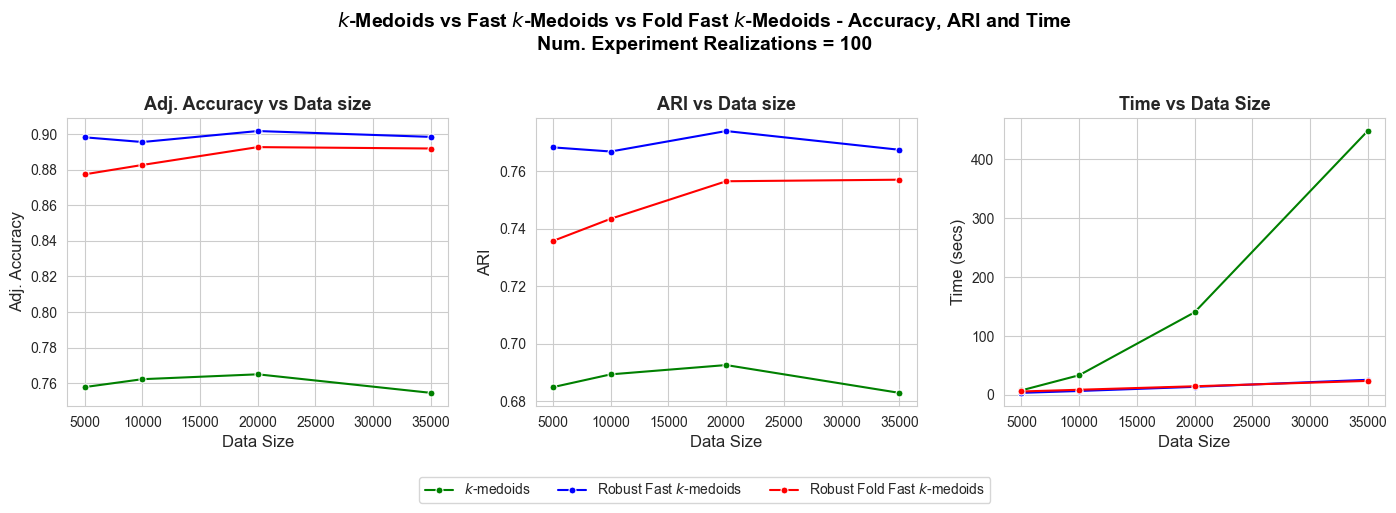

In [3]:
plot_experiment_4_results(df=df_avg, num_realizations=N_REALIZATIONS, save_path=save_path)